# Module 2: Data Analysis

## Sprint 4: Capstone Project

## About this Sprint

It is time for your second Capstone Project.
You will work on this project for the whole Sprint.

We are glad you have successfully reached the final Sprint of this Module.
You will put everything you have learned in this Module to work.
The outcome of this Sprint should potentially serve as your portfolio item, so try to show your best work!

The dataset for this Sprint is the Ultimate 25k+ Matches Football Database.
It is a large dataset, which will provide your with a lot of opportunities both for statistical inference and for prediction.
Once again you will not have concrete tasks or predefined questions - you'll have to be creative and crate a plan for yourself, how to explore the data.

You already had experience doing that while completing the capstone project for the Module 1.
In the industry it's your responsibility as a data scientist to come up with plans and hypothesis for the dataset, so this is an essential skill to practice.
Good luck!

## Objectives for this Part

- Practice identifying opportunities for data analysis, raising hypothesis, and formulating research tasks.
- Practice performing EDA, statistical inference, and prediction.
- Practice working with SQL datasets.
- Practice visualizing data.

## Data

**Ultimate 25k+ Matches Football Database**

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1489944440615-453fc2b6a9a9?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1482&q=80" /></div>

Imagine that you are a data scientist working in a sports betting company.
The business executives in your company after some initial analysis (they watched this video [Understanding European Soccer in Four Simple Steps: A Guide For Americans](https://www.youtube.com/watch?v=FZ4i3KX2CW4)) identified betting on soccer (European football) as an potential new business opportunity.
The problem is that your company doesn't know a lot about soccer (European football).
Your manager asked you to analyse this dataset and see if you can provide anything that could give us a competitive advantage in the attempt to start strong in the new endevor.
She has provided your with some questions, which she suggests are a good starting point for your analysis.

- Which leagues are in which countries?
- Which leagues score the most/fewest goals?
- Who are the top scorers in each team and league?
- Is there such a thing as home advantage?
- Can we predict how many goals each team will score in each match?
- Can we predict which team will win the match?

The link to the [Kaggle dataset is here](https://www.kaggle.com/prajitdatta/ultimate-25k-matches-football-database-european).

## Requirements

- Perform data cleaning and feature engineering. Work with features - handle missing data if needed, use SQL and Pandas functions to create other additional features.
- Perform exploratory data analysis. Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data. Grouping the data and analyzing the groups - using SQL or Pandas aggregate methods. Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.
- Perform statistical inference. Raise and test statistical hypotheses. Set appropriate significance levels and create confidence intervals for the variables of interest.
- Train linear machine learning models and use them for forecasting. Use cross validation, information criteria, and/or other methods to specify your models correctly. Choose and use appropriate metrics to measure your models' performance.
- Create a Google Data Studio dashboard with at least three different types of charts.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Present the project - the data, methods, and results.
- Provide suggestions about how your analysis can be improved.

## Bonus Challenges

As a data scientists you will spend significant amount of your time learning new things.
Sometimes you will do that for fun, but most of the time you will have an urgent problem and you will need to quickly learn some new skill to be able to solve it.
It is very important to gradually build this skill - it is extremely valuable for all data scientists.
The bonus challenges are designed to simulate these types of situations.
These challenges require you to do something that we haven't covered in the course yet.
Instead of trying to do all of the bonus challenges, concentrate on just one or two and do them well.
All of the bonus challenges are optional - no points will be deducted if you skip them.

- Try dimensionality reduction algorithm (e.g. PCA, t-SNE, Autoencoder).
- Try clustering your data.
- Try a nonlinear machine learning model to explain relationships between features and predict new values.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface or did you explored the dataset in depth?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structure? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?
- Delivery of the presentation. How clear are your reasoning and explanations?
- Bonus challenges. Have you put extra effort to do one or more of the bonus challenges (no points will be deducted if you skip them)?

## Correction

During your project correction, you should present it as if talking to a technical team lead and a senior co-worker working in your team.
You can assume that they will have strong data science and software engineering skills - they will understand technical jargon, they are expected to notice things that could have been done better, ask about the choices you've made (especially if you've made some questionable choices).
In addition, be careful not to spend your time explaining trivial concepts or code snippets that are simple - your best bet is to focus your presentation on the more difficult portions of your code.

# 25k+ European Football Matches Dataset Analysis

**About Dataset**

The ultimate Soccer database for data analysis and machine learning. What you get:

- +25,000 matches
- +10,000 players
- 11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates - - Team line up with squad formation (X, Y coordinates)
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches

*16th Oct 2016: New table containing teams' attributes from FIFA !

**Objective for the analysis**

To gather valueable insights that could help in exploiting a new business opportunity, for a sports betting company which wants to start betting on european football games. Possible starting points for the analysis:
- Which leagues are in which countries?
- Which leagues score the most/fewest goals?
- Who are the top scorers in each team and league?
- Is there such a thing as home advantage?
- Can we predict how many goals each team will score in each match?
- Can we predict which team will win the match?

Before we can start exploring the data let's inspect the dataset for missing values, duplicates or any anomalous or incorrect data.

## Data cleaning

In [1]:
try:
  import duckdb
except ImportError:
  !pip install duckdb
  !pip install matplotlib==3.4.0
  !pip install yellowbrick

  import os
  os.kill(os.getpid(), 9)

In [ ]:
!gdown 1zHaWpagjSughvmGX1UswlpuHgAECo7Vg

In [ ]:
!gdown 1YZdnvmdjbpt5uoi4vOjb7VXuRrbqszw9

In [4]:
!unzip football_ds.zip

Archive:  football_ds.zip
  inflating: database.sqlite         


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [6]:
address = 'database.sqlite'
conn = sqlite3.connect(address)

In [7]:
query = """
SELECT *
FROM sqlite_master
WHERE type = 'table';"""

db_tables = pd.read_sql(query, conn)

db_tables['tbl_name']

0      sqlite_sequence
1    Player_Attributes
2               Player
3                Match
4               League
5              Country
6                 Team
7      Team_Attributes
Name: tbl_name, dtype: object

In [8]:
def inspect_df(df: pd.DataFrame) -> None:
  perc = df.isna().mean().sort_values(ascending=False).rename('percentage')*100

  count = df.isna().sum().sort_values(ascending=False).rename('count')

  merged = pd.merge(
      left=perc,
      right=count,
      left_index=True,
      right_index=True
  )

  merged = merged[merged['count']!=0]

  if merged.empty:
    print('No missing values\n')
  else:
    if len(merged) > 50:
      print(f'{len(merged)} rows with NaN values\n'
      + f'Top 20 rows with most NaN values:\n\n{merged[:20]}\n')
    else:
      print(f'Rows with NaN values in each column:\n\n{merged}\n')

  dupl_count = df.duplicated().sum()

  if dupl_count==0:
    print('No duplicate rows')
  else:
    print(f'Number of duplicate rows: {dupl_count}')

### Player attributes data cleaning

In [9]:
query = """
SELECT *
FROM Player_Attributes;"""

player_attr_df = pd.read_sql(
    query,
    conn,
    parse_dates={'date':'%Y-%m-%d %H:%M:%S'}
)

player_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   183978 non-null  int64         
 1   player_fifa_api_id   183978 non-null  int64         
 2   player_api_id        183978 non-null  int64         
 3   date                 183978 non-null  datetime64[ns]
 4   overall_rating       183142 non-null  float64       
 5   potential            183142 non-null  float64       
 6   preferred_foot       183142 non-null  object        
 7   attacking_work_rate  180748 non-null  object        
 8   defensive_work_rate  183142 non-null  object        
 9   crossing             183142 non-null  float64       
 10  finishing            183142 non-null  float64       
 11  heading_accuracy     183142 non-null  float64       
 12  short_passing        183142 non-null  float64       
 13  volleys       

In [10]:
inspect_df(player_attr_df)

Rows with NaN values in each column:

                     percentage  count
attacking_work_rate    1.755645   3230
agility                1.474633   2713
jumping                1.474633   2713
curve                  1.474633   2713
volleys                1.474633   2713
balance                1.474633   2713
vision                 1.474633   2713
sliding_tackle         1.474633   2713
standing_tackle        0.454402    836
marking                0.454402    836
penalties              0.454402    836
gk_diving              0.454402    836
positioning            0.454402    836
gk_handling            0.454402    836
interceptions          0.454402    836
gk_kicking             0.454402    836
aggression             0.454402    836
long_shots             0.454402    836
strength               0.454402    836
stamina                0.454402    836
gk_positioning         0.454402    836
shot_power             0.454402    836
gk_reflexes            0.454402    836
reactions              0.4

There are some players with missing attributes. Let's drop these rows.

In [11]:
player_attr_df.dropna(inplace=True)

### Player data cleaning

In [12]:
query = """
SELECT *
FROM Player;"""

player_df = pd.read_sql(query, conn)

player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [13]:
inspect_df(player_df)

No missing values

No duplicate rows


### Match data cleaning

In [14]:
query = """
SELECT *
FROM Match;"""

match_df = pd.read_sql(
    query,
    conn,
    parse_dates={'date':'%Y-%m-%d %H:%M:%S'}
)

match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: datetime64[ns](1), float64(96), int64(9), object(9)
memory usage: 22.8+ MB


In [15]:
inspect_df(match_df)

104 rows with NaN values
Top 20 rows with most NaN values:

            percentage  count
PSD          57.011432  14811
PSA          57.011432  14811
PSH          57.011432  14811
BSA          45.490589  11818
BSH          45.490589  11818
BSD          45.490589  11818
GBA          45.486739  11817
GBD          45.486739  11817
GBH          45.486739  11817
shotoff      45.275030  11762
goal         45.275030  11762
shoton       45.275030  11762
possession   45.275030  11762
corner       45.275030  11762
cross        45.275030  11762
card         45.275030  11762
foulcommit   45.275030  11762
SJH          34.189153   8882
SJD          34.189153   8882
SJA          34.189153   8882

No duplicate rows


There are columns with more than 50% missing values, so let's remove these columns.

In [16]:
match_df.drop(
    columns=['PSD', 'PSA', 'PSH'],
    inplace=True
)

The goal data is stored as xml strings along with other columns like shoton, shotoff, possession, corner, cross, card, foulcommit. To use the goal data later on we need to extract it. The relevant data will be team id, player id of a player who scored the goal.

In [17]:
import re

team_id = match_df['goal'].dropna().apply(
    lambda x: re.findall('<team>(.*?)</team>', x)
)

player_id = match_df['goal'].dropna().apply(
    lambda x: re.findall('<player1>(.*?)</player1>', x)
)

goals = match_df['goal'].dropna().apply(
    lambda x: re.findall('<goals>(.*?)</goals>|<penalties>(.*?)</penalties>', x)
)

league_id = match_df['league_id'][player_id.index]

In [18]:
from collections import defaultdict

goal_info_dict = defaultdict(list)

for i in range(goals.shape[0]):
  for j in range(len(goals.iloc[i])):
    try:
      t_id = team_id.iloc[i][j]
      p_id = player_id.iloc[i][j]
      l_id = league_id.iloc[i]
    except IndexError:
      continue

    goal_info_dict['team_id'].append(int(t_id))
    goal_info_dict['player_id'].append(int(p_id))
    goal_info_dict['league_id'].append(int(l_id))

    try:
      if goals.iloc[i][j][0]=='':
        goal_info_dict['goals'].append(0)
      else:
        goal_info_dict['goals'].append(int(goals.iloc[i][j][0]))
    except IndexError:
      if goals.iloc[i][j][1]=='':
        goal_info_dict['goals'].append(0)
      else:
        goal_info_dict['goals'].append(int(goals.iloc[i][j][1]))

goal_info_df = pd.DataFrame(goal_info_dict)

### League data cleaning

In [19]:
query = """
SELECT *
FROM League;"""

league_df = pd.read_sql(query, conn)

league_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [20]:
inspect_df(league_df)

No missing values

No duplicate rows


### Country data cleaning

In [21]:
query = """
SELECT *
FROM Country;"""

country_df = pd.read_sql(query, conn)

country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [22]:
inspect_df(country_df)

No missing values

No duplicate rows


### Team data cleaning

In [23]:
query = """
SELECT *
FROM Team;"""

team_df = pd.read_sql(query, conn)

team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [24]:
inspect_df(team_df)

Rows with NaN values in each column:

                  percentage  count
team_fifa_api_id     3.67893     11

No duplicate rows


### Team attributes data cleaning

In [25]:
query = """
SELECT *
FROM Team_Attributes;"""

team_attr_df = pd.read_sql(
    query,
    conn,
    parse_dates={'date':'%Y-%m-%d %H:%M:%S'}
)

team_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1458 non-null   int64         
 1   team_fifa_api_id                1458 non-null   int64         
 2   team_api_id                     1458 non-null   int64         
 3   date                            1458 non-null   datetime64[ns]
 4   buildUpPlaySpeed                1458 non-null   int64         
 5   buildUpPlaySpeedClass           1458 non-null   object        
 6   buildUpPlayDribbling            489 non-null    float64       
 7   buildUpPlayDribblingClass       1458 non-null   object        
 8   buildUpPlayPassing              1458 non-null   int64         
 9   buildUpPlayPassingClass         1458 non-null   object        
 10  buildUpPlayPositioningClass     1458 non-null   object        
 11  chan

In [26]:
inspect_df(team_attr_df)

Rows with NaN values in each column:

                      percentage  count
buildUpPlayDribbling   66.460905    969

No duplicate rows


More than 60% of buildUpPlayDribbling columns data is missing, so let's drop it.

In [27]:
team_attr_df.dropna(axis='columns', inplace=True)

## Exploratory data analysis

### League countries and their goal count

To begin exploring the data let's see the nationalities of each league.

In [28]:
df = duckdb.query("""
SELECT l.name league, c.name country
FROM league_df l
JOIN country_df c ON l.country_id=c.id
""").to_df()

df

,league,country
0,Belgium Jupiler League,Belgium
1,England Premier League,England
2,France Ligue 1,France
3,Germany 1. Bundesliga,Germany
4,Italy Serie A,Italy
5,Netherlands Eredivisie,Netherlands
6,Poland Ekstraklasa,Poland
7,Portugal Liga ZON Sagres,Portugal
8,Scotland Premier League,Scotland
9,Spain LIGA BBVA,Spain


Seems like these leagues of 11 countries are the major leagues of Europe. Let's compare their goal count.

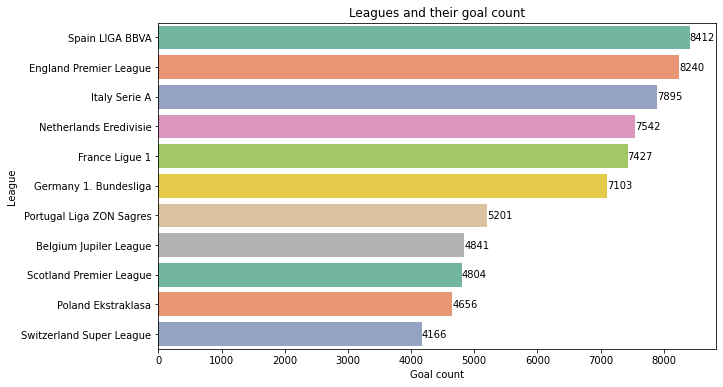

In [29]:
df = duckdb.query("""
SELECT l.name league, SUM(m.home_team_goal + m.away_team_goal) goal_count
FROM league_df l
JOIN match_df m ON m.league_id=l.id
GROUP BY l.id, 1
ORDER BY 2 DESC
""").to_df()

plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=df,
    x='goal_count',
    y='league',
    palette='Set2'
)

ax.bar_label(ax.containers[0])
ax.set_title('Leagues and their goal count')
ax.set_xlabel('Goal count')
ax.set_ylabel('League')

plt.show()

The league with most goals scored is Spain LIGA BBVA and league with the fewest goals scored is Switzerland Super League. Now it would be interesting to see how these goal counts vary over the year.

### League goal count over time

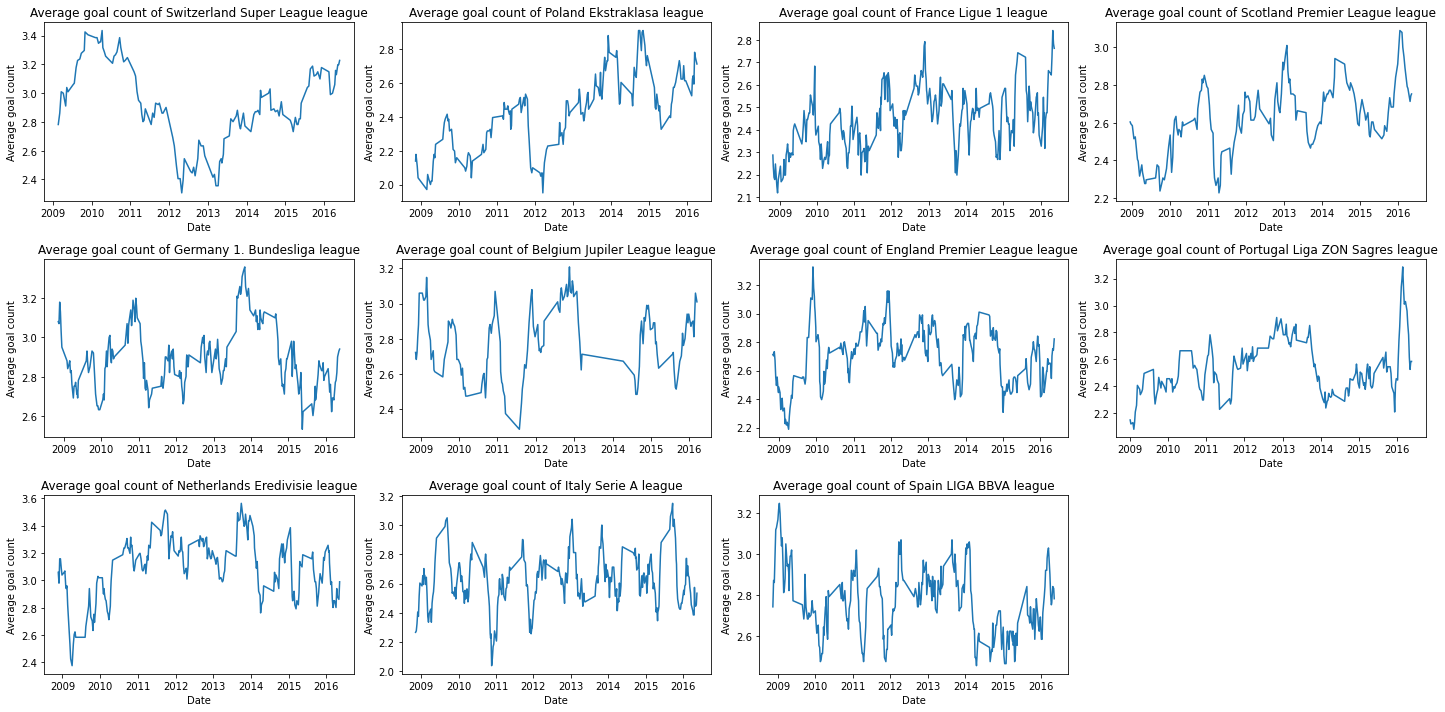

In [30]:
df = duckdb.query("""
SELECT m.date, l.name league,
  AVG(m.home_team_goal + m.away_team_goal) OVER(
    PARTITION BY l.name
    ORDER BY m.date
    ROWS BETWEEN 100 PRECEDING AND CURRENT ROW)
  AS avg_goal_count
FROM league_df l
JOIN match_df m ON m.league_id=l.id
ORDER BY 1
""").to_df()

fig, ax = plt.subplots(3,4,figsize=(20,10))

leagues = df['league'].unique()

curr_plot = 0

for row in range(3):
  for col in range(4):
    if curr_plot==len(leagues):
      plt.delaxes(ax[row][col])
      break

    sns.lineplot(
        data=df[df['league']==leagues[curr_plot]].iloc[100::10],
        x='date',
        y='avg_goal_count',
        palette='Set2',
        markers=True,
        ax=ax[row][col]
    )

    ax[row][col].set_title(f'Average goal count of {leagues[curr_plot]} league')
    ax[row][col].set_xlabel('Date')
    ax[row][col].set_ylabel('Average goal count')

    curr_plot +=1

plt.tight_layout()
plt.show()

Seems like average goal count changed in some leagues more than in other ones over the years. We can see some increase in average goal count in the polish and scottish leagues. Let's now see which players had scored the most goals in each league and team.

### Players who scored the most goals in each league

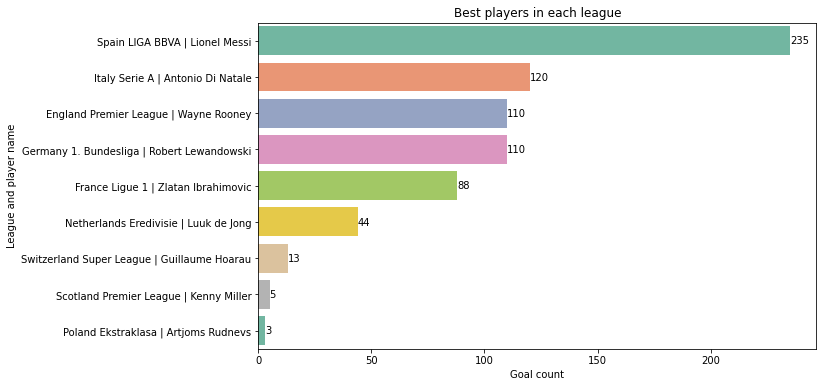

In [31]:
df = duckdb.query("""
WITH t1 AS
(SELECT league_id, player_id, SUM(goals) goal_sum
FROM goal_info_df gi
GROUP BY 1, 2),

t2 AS
(SELECT league_id, MAX(goal_sum) max_goals
FROM t1
GROUP BY league_id)

SELECT CONCAT(l.name, ' | ', p.player_name) league_player_name, 
t1.goal_sum goals
FROM t1
JOIN t2 ON t1.league_id=t2.league_id AND t1.goal_sum=t2.max_goals
JOIN league_df l ON t1.league_id=l.id
JOIN player_df p ON t1.player_id=p.player_api_id
ORDER BY 2 DESC
""").to_df()

plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=df,
    x='goals',
    y='league_player_name',
    palette='Set2'
)

ax.bar_label(ax.containers[0])
ax.set_title('Best players in each league')
ax.set_xlabel('Goal count')
ax.set_ylabel('League and player name')

plt.show()

From this plot we can see players who scored the most goals in each league. Lionel Messi scored 235 goals which is more than any other player from other leagues. We can also check which players scored most goals in specific teams.

### Players who scored the most goals in each team

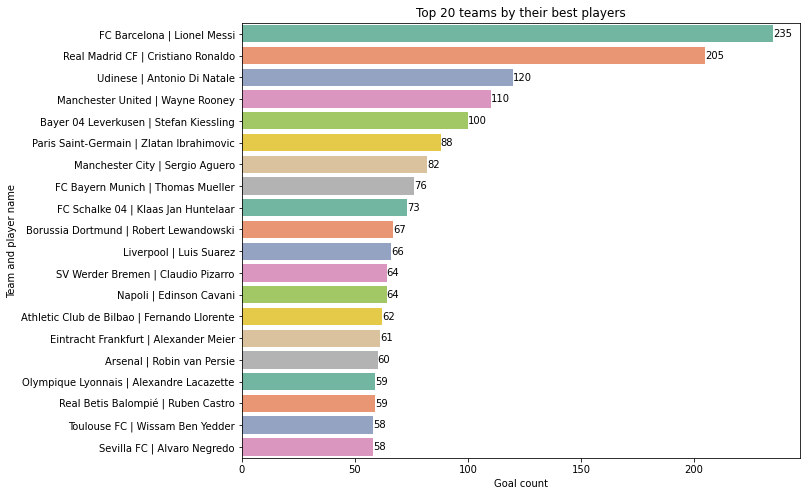

In [32]:
df = duckdb.query("""
WITH t1 AS
(SELECT team_id, player_id, SUM(goals) goal_sum
FROM goal_info_df gi
GROUP BY 1, 2),

t2 AS
(SELECT team_id, MAX(goal_sum) max_goals
FROM t1
GROUP BY team_id)

SELECT CONCAT(t.team_long_name, ' | ', p.player_name) team_player_name, 
t1.goal_sum goals
FROM t1
JOIN t2 ON t1.team_id=t2.team_id AND t1.goal_sum=t2.max_goals
JOIN team_df t ON t1.team_id=t.team_api_id
JOIN player_df p ON t1.player_id=p.player_api_id
ORDER BY 2 DESC
LIMIT 20
""").to_df()

plt.figure(figsize=(10,8))

ax = sns.barplot(
    data=df,
    x='goals',
    y='team_player_name',
    palette='Set2'
)

ax.bar_label(ax.containers[0])
ax.set_title('Top 20 teams by their best players')
ax.set_xlabel('Goal count')
ax.set_ylabel('Team and player name')

plt.show()

Here we can see top 20 teams by their top performing players. In the top we can see names like Lionel Messi and Cristiano Ronaldo.

### Testing for difference between home and away team winnings

Let's first check the summary statistics and distributions of home and away team scored goals.

In [33]:
df = duckdb.query("""
SELECT home_team_goal, away_team_goal
FROM match_df 
""").to_df()

df.describe()

,home_team_goal,away_team_goal
count,25979.000000,25979.000000
mean,1.544594,1.160938
std,1.297158,1.142110
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,9.000000


The mean is slightly higher with the home team.

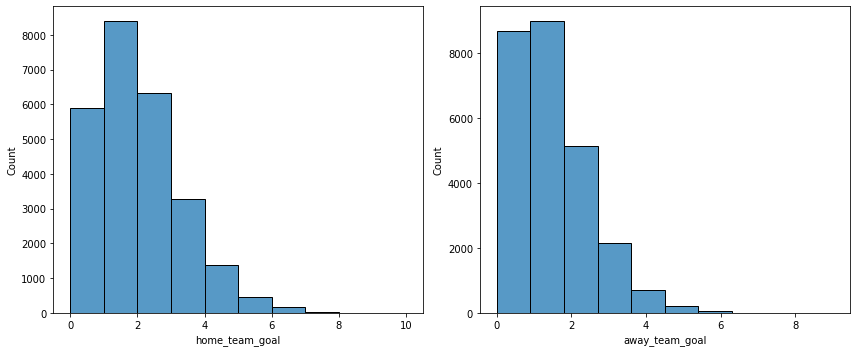

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(
    data=df,
    x='home_team_goal',
    bins=10,
    ax=ax[0]
)

sns.histplot(
    data=df,
    x='away_team_goal',
    bins=10,
    ax=ax[1]
)

plt.tight_layout()
plt.show()

We see that with away team goals, the values are concentrated more on the lower end. Let's do a statistical test to see if this difference is significant.

First we need to get the proportions of wins for home and away teams and then perform proportion ztest.

Our null and alternative hypothesis:
- H<sub>0</sub>: there is no difference in proportions of home and away team wins (p<sub>home</sub> - p<sub>away</sub> = 0);
- H<sub>a</sub>: there is a difference in proportions of home and away team wins (p<sub>home</sub> - p<sub>away</sub> >< 0);

Significance level - 95%

In [35]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05

df['home_wins'] = df.apply(
    lambda x: 1 if x.home_team_goal>x.away_team_goal else 0,
    axis=1
)

df['away_wins'] = df.apply(
    lambda x: 1 if x.home_team_goal<x.away_team_goal else 0,
    axis=1
)

wins = np.array([
    df['home_wins'].sum(),
    df['away_wins'].sum()
])

sample_sizes = np.array([df.shape[0], df.shape[0]])

zstat, pvalue = proportions_ztest(
    count=wins,
    nobs=sample_sizes,
    alternative='two-sided'
)

print(f'zstat: {zstat:.4f}, pvalue: {pvalue:.4f}\n')

if pvalue > alpha:
   print (f'P value is more than alpha {alpha}, \
   so we fail to reject the null hypothesis')
else:
   print (f'P value is less than alpha {alpha}, so we can reject the null \
   \nhypothesis and suggest the alternative hypothesis is true')

zstat: 40.3767, pvalue: 0.0000

P value is less than alpha 0.05, so we can reject the null    
hypothesis and suggest the alternative hypothesis is true


These results mean that teams that play at home are more likely to win the match.

### Exploring player data

Let's use the latest data of each player and see the variability and distributions of the attributes. Here are some explanations for these attributes:
- overall_rating: Average player skill rating
- potential: It is an estimate that indicates what the maximum overall_rating of a player will be during his professional career.
- preferred_foot: Indicates which leg the player tends to play with and therefore, on which he has greater power and control of the ball.
- attacking_work_rate and defensive_work_rate: The work rates indicate the level of involvement or participation of a player in attacking or defending movements. These attributes can have the values ​​high, medium and low.
- crossing: Determines the quality and precision of a player to make a pass towards the center of the field, close to the opponent's goal.
- finishing: Indicates the player's ability to score a goal.
- heading_accuracy: Sets the player's accuracy to pass or spread the ball using his head.
- short_passing: Player's ability to make short passes
- volleys: This skill demonstrates a player's ability to make shots or passes while the ball is in the air.
- dribbling: Evaluates the ability to maintain possession of the ball in front of an opponent. This metric primarily measures the player's dribbling prowess.
- curve: Establishes the player's ability to make passes or shots with a curve effect.
- free_kick_accuracy: Accuracy or skill of the player in free kicks.
- long_passing: Player's ability to make long passes
- ball_control: Player control level over the ball.
- acceleration: Ability to increase the speed of the player on the field.
- sprint_speed: Sets the speed of the player
- agility: Evaluates how fast a player is able to handle the ball.
- reactions: Player's response time to events that happen around him.
- balance: Shows the balance level of the player.
- shot_power: This attribute determines the power of a player's shots.
- jumping: Score the skill and quality of jumping.
- stamina: Indicates the ability to sustain physical effort.
- strength: Shows the physical strength of a player.
- long_shots: Ability of the player to make long shots.
- aggression: Measures the frequency of pushing, pulling and tackling components of the rival team.
- interceptions: Ability to intercept the ball during passes from the opposing team.
- positioning: Indicates the ability of players to position themselves correctly on the field.
- vision: Mental ability of the player to remember the positions of his teammates.
- penalties: Accuracy of the player to take penalties.
- marking: Ability to defend against a play by the opposing team
- standing_tackle: Ability of the player to make tackles, that is, to extend the leg to move the ball away from the opponent.
- sliding_tackle: Ability of the player to make tackles, that is, to extend the leg to move the ball away from the opponent
- gk_diving: Attribute of the goalkeeper that indicates the ability to stop the ball using the diving technique.
- gk_handling: Another goalkeeper property that sets how often the goalkeeper catches or catches the ball.
- gk_kicking: Evaluates the length and accuracy of goalkeeper kicks.
- gk_positioning: Ability of the goalkeeper to position himself correctly during the match
- gk_reflexes: Evaluates the ability of the goalkeeper against shots on goal.

In [36]:
from ds_utils import multi_plots

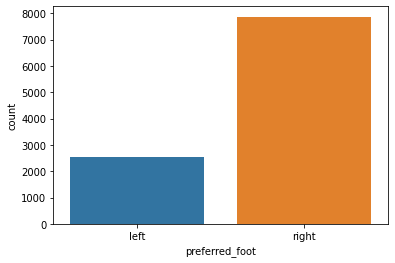

In [37]:
latest_pa_df = duckdb.query("""
WITH t1 AS
(SELECT player_api_id, MAX(date) latest_date
FROM player_attr_df
GROUP BY player_api_id)

SELECT *
FROM player_attr_df pa
JOIN t1 ON pa.player_api_id=t1.player_api_id AND pa.date=t1.latest_date
JOIN player_df p ON pa.player_api_id=p.player_api_id
""").to_df()

latest_pa_df = latest_pa_df.astype(
    {'weight':'float'}
)

sns.countplot(
    data=latest_pa_df,
    x='preferred_foot'
)

plt.show()

We can see that most players prefer using the right foot for playing.

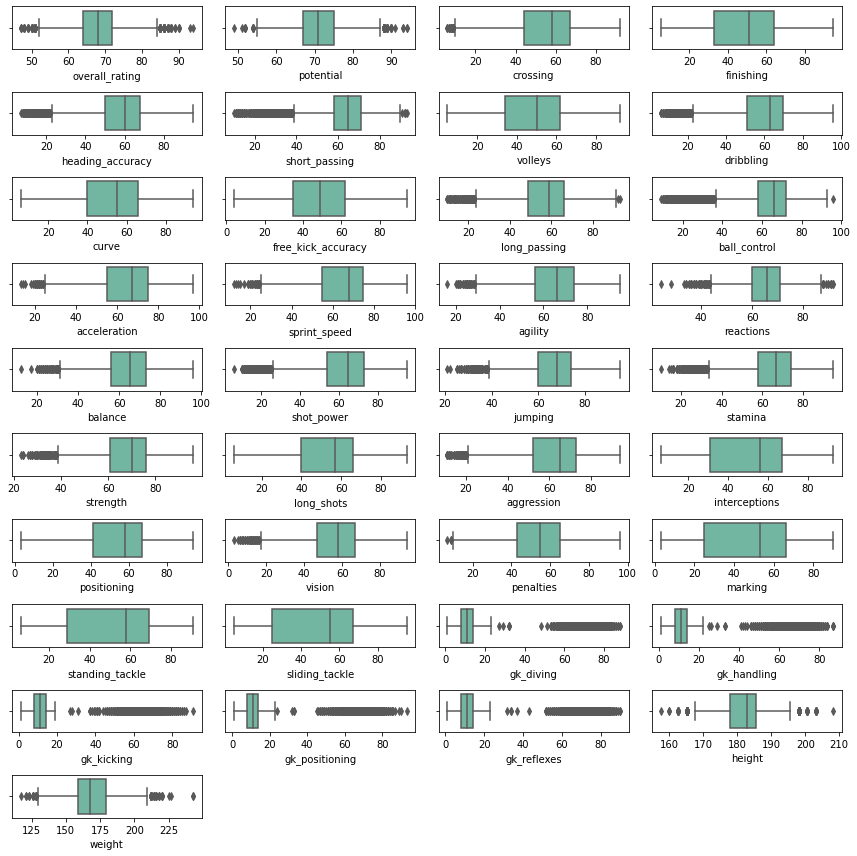

In [38]:
cols = list(
    latest_pa_df.select_dtypes(include='float64').columns
)

plot_info = {
    'plot_kinds':['box'],
    'plot_x':cols
}

multi_plots(
    latest_pa_df,
    plot_info,
    n_rows=10,
    n_cols=4,
    size=(12,12),
    n_plots=len(cols)
)

Most outliers can be seen in terms of goal keeper attributes, but maybe that is because some players mostly specialize in goal keeping. Also other outliers are mostly on the lower end which means some players are rated very poorly on some attributes.

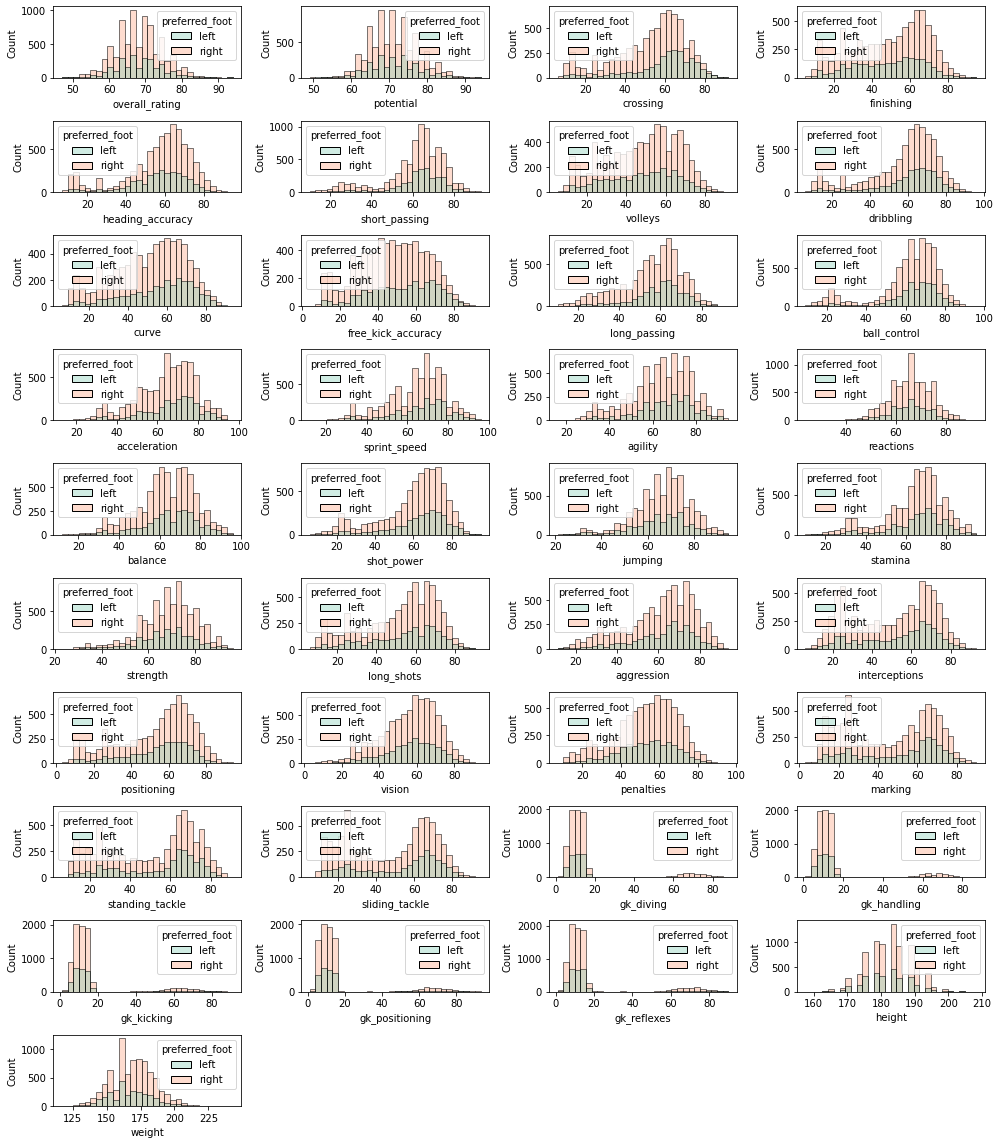

In [39]:
cols = list(
    latest_pa_df.select_dtypes(include='float64').columns
)

plot_info = {
    'plot_kinds':['hist'],
    'plot_x':cols,
    'plot_hue':['preferred_foot'],
    'plot_kwargs':[{
        'bins':30,
        'alpha':0.3
    }]
}

multi_plots(
    latest_pa_df,
    plot_info,
    n_rows=10,
    n_cols=4,
    size=(14,16),
    n_plots=len(cols)
)

Firstly, we can see that there is no difference in distributions regarding which foot a player uses. Secondly, most distributions are bimodal or atleast skewed towards the lower end. Overall rating, potential, weight and height seems to be bell shaped.

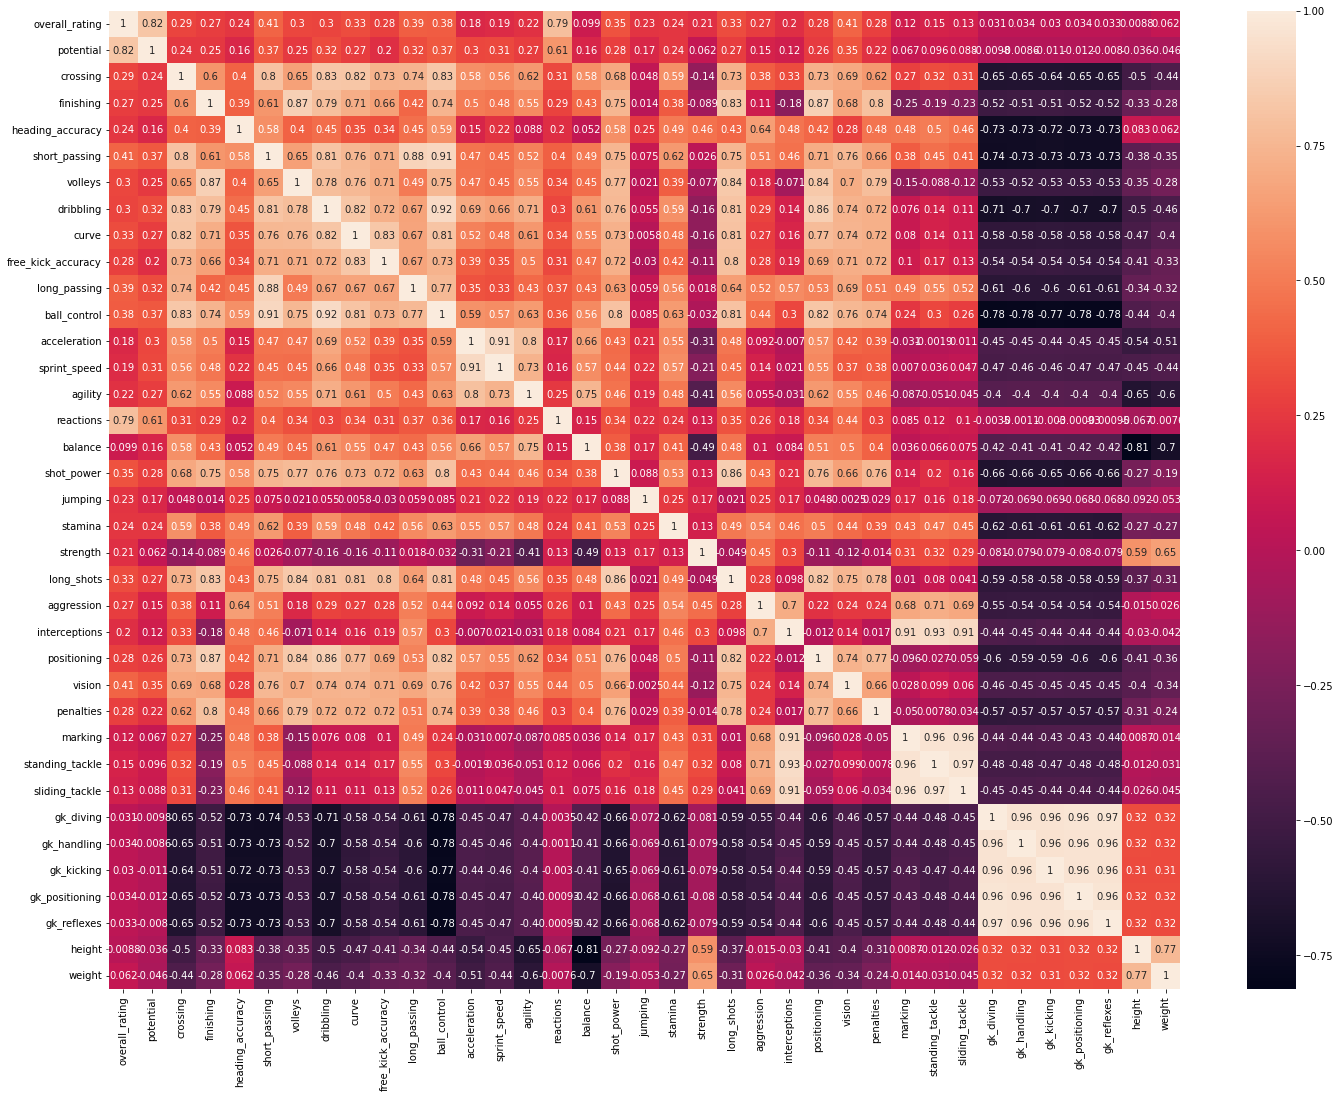

In [40]:
plt.figure(figsize=(24,18))

corr = latest_pa_df.select_dtypes(include='float64').corr()

sns.heatmap(
    corr,
    annot=True
)

plt.show()

From the correlation matrix we can see that overall rating and potential are mostly correlated with reactions, which could indicate that this attribute has a highest weight to overall rating and potential. Also, reactions is mildly correlated with other attributes. Other attributes, apart from a few other attributes that do not correlate much like jumping, strength, are correlated with each other, mostly in a positive way. Other thing worth noting is that goal keeper attributes are negatively correlated with most attributes, but strongly positvely correlated with each other. This could mean that goal keeping requires special attributes which aren't important when being anything other than a goal keeper.

It would be interesting to see if some attributes are rated higher among players that scored the most goals. Also, compare against players who did not perform well.

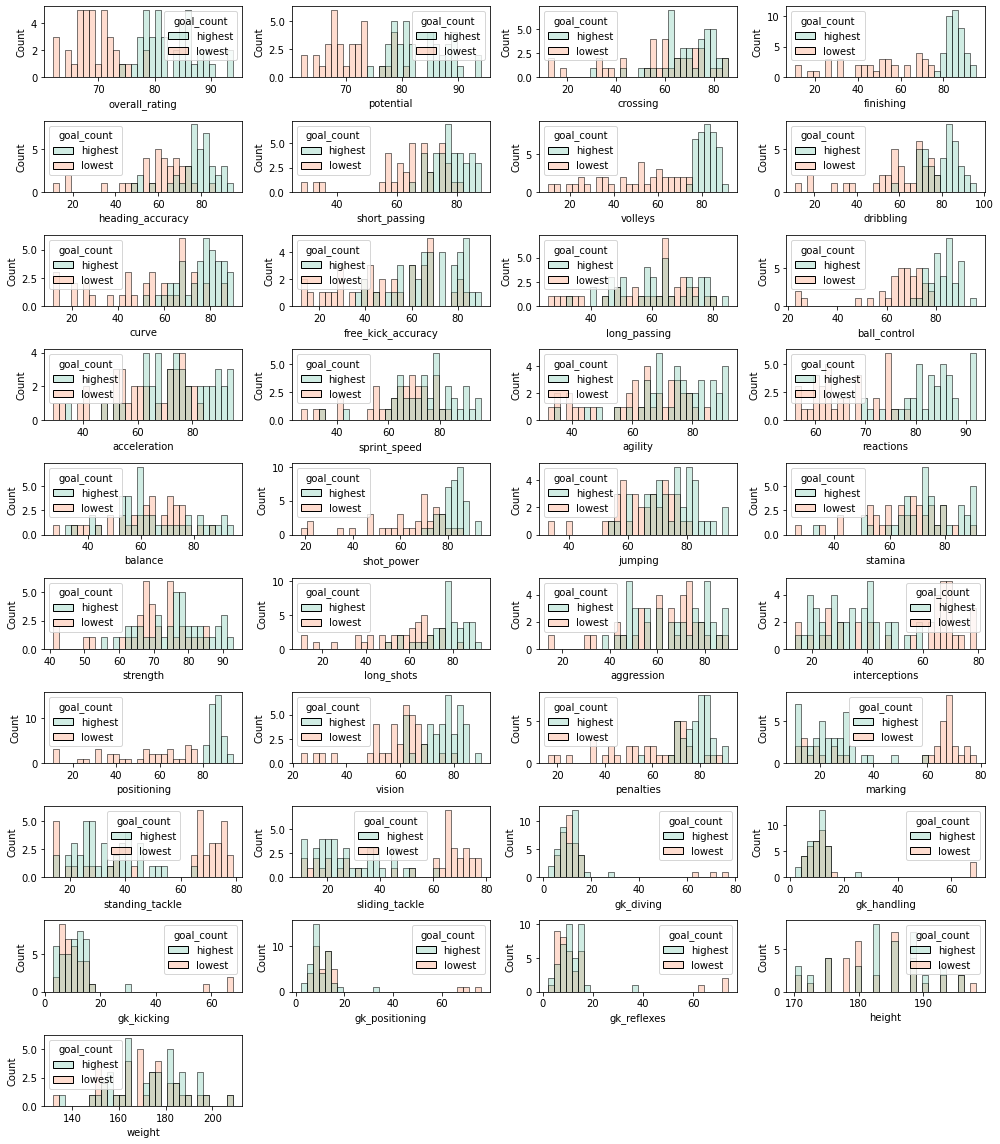

In [41]:
df = duckdb.query("""
WITH t1 AS
(SELECT gi.player_id, p.player_name, SUM(goals)
FROM goal_info_df gi
JOIN player_df p ON gi.player_id=p.player_api_id
GROUP BY 1, 2
ORDER BY 3 DESC
LIMIT 40),

t2 AS
(SELECT gi.player_id, p.player_name, SUM(goals)
FROM goal_info_df gi
JOIN player_df p ON gi.player_id=p.player_api_id
GROUP BY 1, 2
ORDER BY 3
LIMIT 40)

SELECT lpa.*, 'highest' goal_count
FROM latest_pa_df lpa
JOIN t1 ON lpa.player_api_id=t1.player_id AND lpa.player_name=t1.player_name
UNION
SELECT lpa.*, 'lowest' goal_count
FROM latest_pa_df lpa
JOIN t2 ON lpa.player_api_id=t2.player_id AND lpa.player_name=t2.player_name
""").to_df()

cols = list(
    df.select_dtypes(include='float64').columns
)

plot_info = {
    'plot_kinds':['hist'],
    'plot_x':cols,
    'plot_hue':['goal_count'],
    'plot_kwargs':[{
        'bins':30,
        'alpha':0.3
    }]
}

multi_plots(
    df,
    plot_info,
    n_rows=10,
    n_cols=4,
    size=(14,16),
    n_plots=len(cols)
)

There are some obvious differences in rating with some attributes like overall rating, potential, finishing, volleys, ball control, reactions, positioning. Which might mean these attributes contribute the most when it comes to scoring goals. Though with some attributes the difference isn't that clear like with goal keeper attributes, height, weight, aggression, stamina, strength, acceleration, sprint speed, agility, long passing.

### Google data studio report for player data

Link to the report - https://datastudio.google.com/reporting/2339a168-0ae5-4690-bdea-4fc9ee53445b

## Prediction of number of goals a team will score and match outcome

Now we will see how well we can predict how much goals a team will score and which team will win a match using linear machine learning models. We will also find out which features have more effect for these two outcome variables. We will begin with creating proper datasets for goal and match outcome prediction. Before extracting the data let's convert ordinal factor variables to numeric values.

In [42]:
team_attr_df['buildUpPlaySpeedClass'] =\
 team_attr_df['buildUpPlaySpeedClass'].apply(
    lambda x: 0 if x=='Slow' else 1 if x=='Balanced' else 2
)

team_attr_df['buildUpPlayPassingClass'] =\
 team_attr_df['buildUpPlayPassingClass'].apply(
    lambda x: 0 if x=='Short' else 1 if x=='Mixed' else 2
)

team_attr_df['buildUpPlayDribblingClass'] =\
 team_attr_df['buildUpPlayDribblingClass'].apply(
    lambda x: 0 if x=='Little' else 1 if x=='Normal' else 2
)

team_attr_df['chanceCreationPassingClass'] =\
 team_attr_df['chanceCreationPassingClass'].apply(
    lambda x: 0 if x=='Risky' else 1 if x=='Normal' else 2
)

team_attr_df['chanceCreationCrossingClass'] =\
 team_attr_df['chanceCreationCrossingClass'].apply(
    lambda x: 0 if x=='Little' else 1 if x=='Normal' else 2
)

team_attr_df['chanceCreationShootingClass'] =\
 team_attr_df['chanceCreationShootingClass'].apply(
    lambda x: 0 if x=='Little' else 1 if x=='Normal' else 2
)

team_attr_df['defenceTeamWidthClass'] =\
 team_attr_df['defenceTeamWidthClass'].apply(
    lambda x: 0 if x=='Narrow' else 1 if x=='Normal' else 2
)

In order to query the dataset, first we need to match the team attribute data to every home and away team in the match table. Then we can take the difference in attribute values and position values of home and away teams. The resulting columns are date, month, stage, match api id, league id, home team goals, away team goals, match outcome, betting company odds for home win, away win and draw, position coordinates, the rest is team attribute data.

In [43]:
dataset = duckdb.query("""
WITH home_teams AS
(SELECT m.*, ta.buildUpPlaySpeed, ta.buildUpPlaySpeedClass, 
ta.buildUpPlayDribblingClass, ta.buildUpPlayPassing, ta.buildUpPlayPassingClass, 
ta.buildUpPlayPositioningClass, ta.chanceCreationPassing, 
ta.chanceCreationPassingClass, ta.chanceCreationCrossing, 
ta.chanceCreationCrossingClass, ta.chanceCreationShooting, 
ta.chanceCreationShootingClass, ta.chanceCreationPositioningClass, 
ta.defencePressure, ta.defencePressureClass, ta.defenceAggression, 
ta.defenceAggressionClass, ta.defenceTeamWidth, ta.defenceTeamWidthClass, 
ta.defenceDefenderLineClass
FROM match_df m
JOIN team_attr_df ta
ON DATE_TRUNC('year', m.date)=DATE_TRUNC('year', ta.date) 
AND m.home_team_api_id=ta.team_api_id),

away_teams AS
(SELECT m.match_api_id, ta.buildUpPlaySpeed, ta.buildUpPlaySpeedClass, 
ta.buildUpPlayDribblingClass, ta.buildUpPlayPassing, ta.buildUpPlayPassingClass, 
ta.buildUpPlayPositioningClass, ta.chanceCreationPassing, 
ta.chanceCreationPassingClass, ta.chanceCreationCrossing, 
ta.chanceCreationCrossingClass, ta.chanceCreationShooting, 
ta.chanceCreationShootingClass, ta.chanceCreationPositioningClass, 
ta.defencePressure, ta.defencePressureClass, ta.defenceAggression, 
ta.defenceAggressionClass, ta.defenceTeamWidth, ta.defenceTeamWidthClass, 
ta.defenceDefenderLineClass
FROM match_df m
JOIN team_attr_df ta
ON DATE_TRUNC('year', m.date)=DATE_TRUNC('year', ta.date) 
AND m.away_team_api_id=ta.team_api_id)


SELECT ht.date, CAST(datepart('month', ht.date) AS string) AS month, ht.stage,
ht.match_api_id, ht.league_id, ht.home_team_goal, ht.away_team_goal,

CASE 
  WHEN ht.home_team_goal > ht.away_team_goal THEN 'home_win'
  WHEN ht.home_team_goal < ht.away_team_goal THEN 'away_win'
  ELSE 'draw'
END match_outcome,

ht.B365H, ht.B365D, ht.B365A, ht.BWH, ht.BWD, ht.BWA, ht.IWH, ht.IWD, ht.IWA,
ht.LBH, ht.LBD, ht.LBA, ht.WHH, ht.WHD, ht.WHA, ht.SJH, ht.SJD, ht.SJA, ht.VCH,
ht.VCD, ht.VCA, ht.GBH, ht.GBD, ht.GBA, ht.BSH, ht.BSD, ht.BSA,

ht.home_player_X1-ht.away_player_X1 X1, 
ht.home_player_X2-ht.away_player_X2 X2, 
ht.home_player_X3-ht.away_player_X3 X3, 
ht.home_player_X4-ht.away_player_X4 X4, 
ht.home_player_X5-ht.away_player_X5 X5,
ht.home_player_X6-ht.away_player_X6 X6, 
ht.home_player_X7-ht.away_player_X7 X7, 
ht.home_player_X8-ht.away_player_X8 X8, 
ht.home_player_X9-ht.away_player_X9 X9, 
ht.home_player_X10-ht.away_player_X10 X10,
ht.home_player_X11-ht.away_player_X11 X11, 

ht.home_player_Y1-ht.away_player_Y1 Y1, 
ht.home_player_Y2-ht.away_player_Y2 Y2, 
ht.home_player_Y3-ht.away_player_Y3 Y3,
ht.home_player_Y4-ht.away_player_Y4 Y4, 
ht.home_player_Y5-ht.away_player_Y5 Y5, 
ht.home_player_Y6-ht.away_player_Y6 Y6, 
ht.home_player_Y7-ht.away_player_Y7 Y7, 
ht.home_player_Y8-ht.away_player_Y8 Y8, 
ht.home_player_Y9-ht.away_player_Y9 Y9, 
ht.home_player_Y10-ht.away_player_Y10 Y10, 
ht.home_player_Y11-ht.away_player_Y11 Y11,

ht.buildUpPlaySpeed-at.buildUpPlaySpeed buildUpPlaySpeed, 
ht.buildUpPlaySpeedClass-at.buildUpPlaySpeedClass buildUpPlaySpeedClass, 
ht.buildUpPlayDribblingClass-at.buildUpPlayDribblingClass buildUpPlayDribblingClass, 
ht.buildUpPlayPassing-at.buildUpPlayPassing buildUpPlayPassing, 
ht.buildUpPlayPassingClass-at.buildUpPlayPassingClass buildUpPlayPassingClass, 
ht.buildUpPlayPositioningClass HT_buildUpPlayPositioningClass, 
at.buildUpPlayPositioningClass AT_buildUpPlayPositioningClass, 
ht.chanceCreationPassing-at.chanceCreationPassing chanceCreationPassing, 
ht.chanceCreationPassingClass-at.chanceCreationPassingClass chanceCreationPassingClass, 
ht.chanceCreationCrossing-at.chanceCreationCrossing chanceCreationCrossing, 
ht.chanceCreationCrossingClass-at.chanceCreationCrossingClass chanceCreationCrossingClass, 
ht.chanceCreationShooting-at.chanceCreationShooting chanceCreationShooting, 
ht.chanceCreationShootingClass-at.chanceCreationShootingClass chanceCreationShootingClass, 
ht.chanceCreationPositioningClass HT_chanceCreationPositioningClass, 
at.chanceCreationPositioningClass AT_chanceCreationPositioningClass, 
ht.defencePressure-at.defencePressure defencePressure, 
ht.defencePressureClass HT_defencePressureClass, 
at.defencePressureClass AT_defencePressureClass, 
ht.defenceAggression-at.defenceAggression defenceAggression, 
ht.defenceAggressionClass HT_defenceAggressionClass, 
at.defenceAggressionClass AT_defenceAggressionClass, 
ht.defenceTeamWidth-at.defenceTeamWidth defenceTeamWidth, 
ht.defenceTeamWidthClass-at.defenceTeamWidthClass defenceTeamWidthClass, 
ht.defenceDefenderLineClass HT_defenceDefenderLineClass, 
at.defenceDefenderLineClass AT_defenceDefenderLineClass
FROM home_teams ht
JOIN away_teams at ON ht.match_api_id=at.match_api_id
ORDER BY 1
""").to_df()

Before we start applying linear models let's first do some exploration of the dataset.

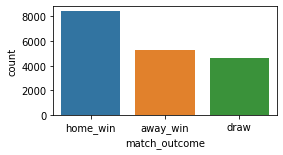

In [44]:
plt.figure(figsize=(4,2))

sns.countplot(
    data=dataset,
    x='match_outcome'
)

plt.show()

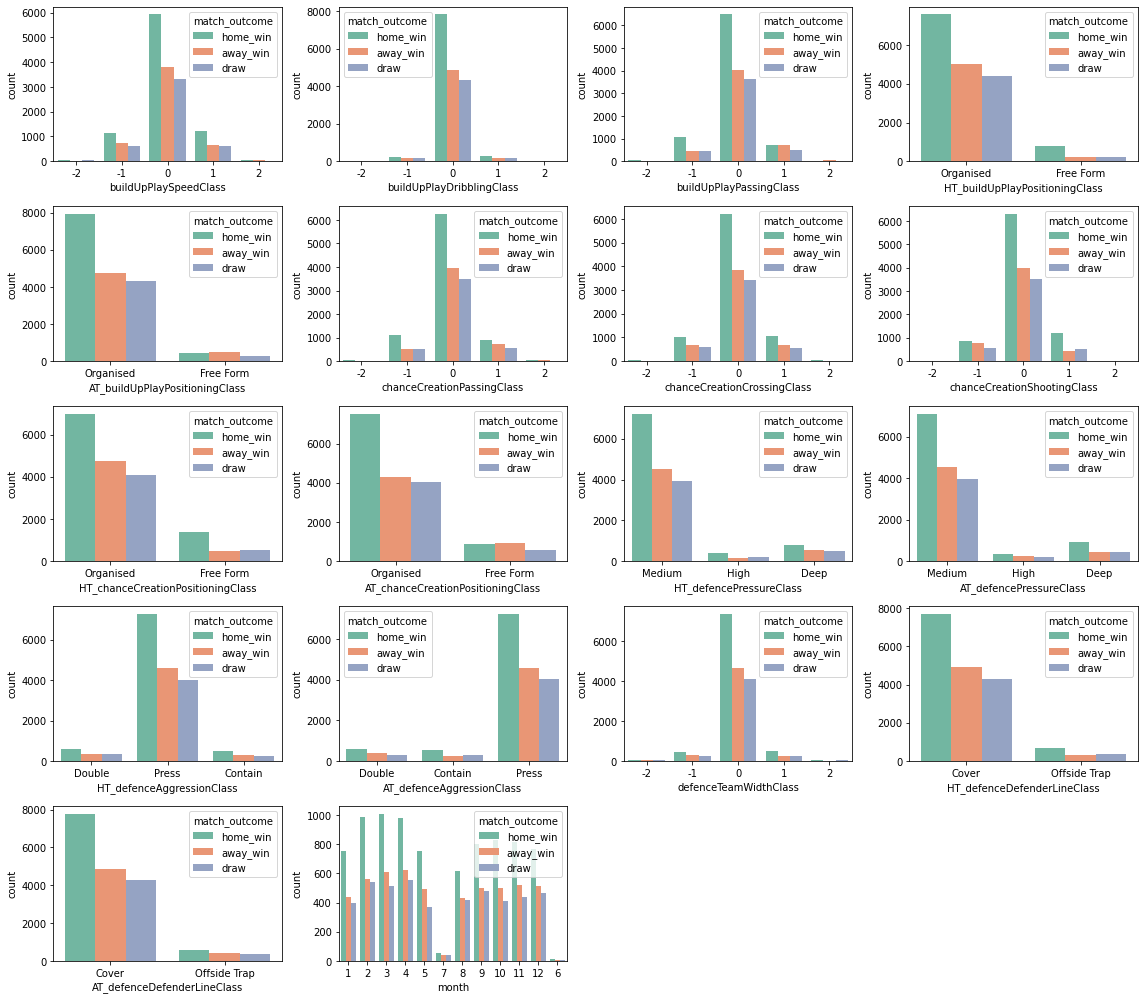

In [45]:
cols = [
    'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass', 
    'buildUpPlayPassingClass', 'HT_buildUpPlayPositioningClass', 
    'AT_buildUpPlayPositioningClass', 'chanceCreationPassingClass', 
    'chanceCreationCrossingClass', 'chanceCreationShootingClass', 
    'HT_chanceCreationPositioningClass', 'AT_chanceCreationPositioningClass',
    'HT_defencePressureClass', 'AT_defencePressureClass', 
    'HT_defenceAggressionClass', 'AT_defenceAggressionClass', 
    'defenceTeamWidthClass', 'HT_defenceDefenderLineClass', 
    'AT_defenceDefenderLineClass', 'month'
]

plot_info = {
    'plot_kinds':['count'],
    'plot_x':cols,
    'plot_hue':['match_outcome']
}

multi_plots(
    dataset,
    plot_info,
    n_rows=5,
    n_cols=4,
    size=(16,14),
    n_plots=len(cols)
)

Here we can see that in most cases one category dominates the data of a category variable. So these variables might not be very useful in predicting the outcome variable. Also we can see that there isn't any particular difference in terms of the match outcome variable. To use the categorical variables in regression we need dummy encoding.

In [46]:
dataset = pd.get_dummies(
    dataset,
    drop_first=True,
    columns=[
        'month', 'HT_buildUpPlayPositioningClass', 
        'AT_buildUpPlayPositioningClass', 'HT_chanceCreationPositioningClass', 
        'AT_chanceCreationPositioningClass', 'HT_defencePressureClass', 
        'AT_defencePressureClass', 'HT_defenceAggressionClass', 
        'AT_defenceAggressionClass', 'HT_defenceDefenderLineClass',
        'AT_defenceDefenderLineClass', 'league_id'
    ]
)

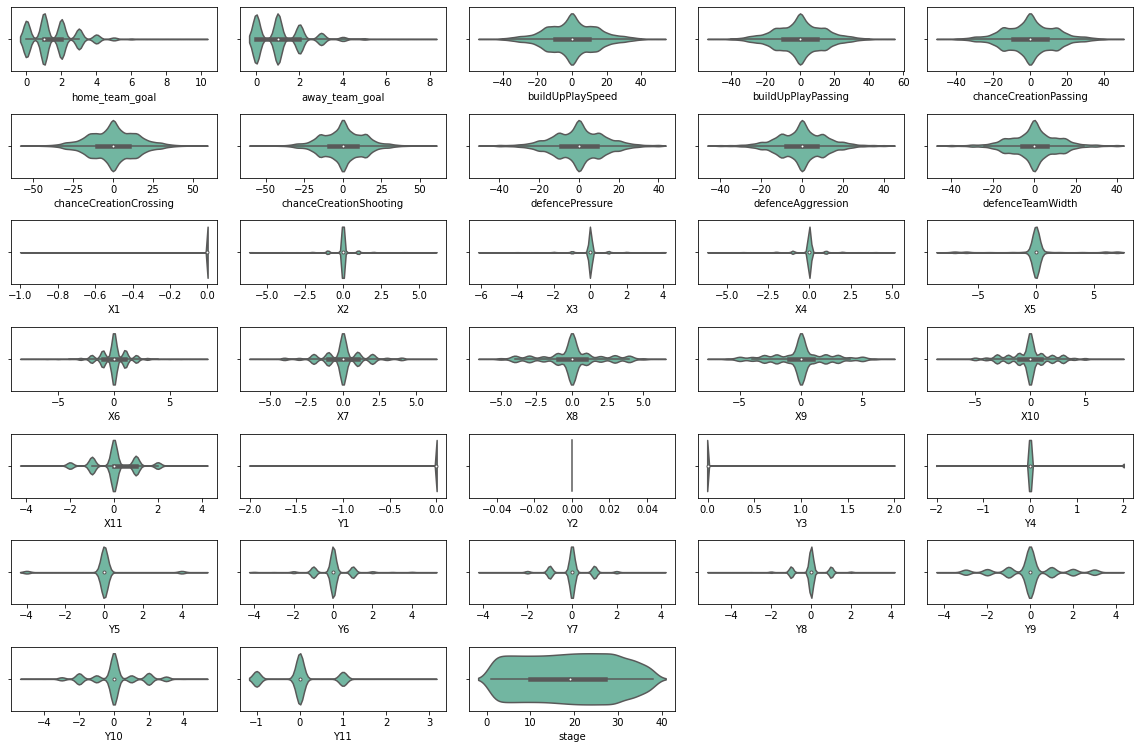

In [47]:
cols = [
    'home_team_goal', 'away_team_goal', 'buildUpPlaySpeed', 'buildUpPlayPassing', 
    'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 
    'defencePressure', 'defenceAggression', 'defenceTeamWidth',
    'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
    'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 'stage'
]

plot_info = {
    'plot_kinds':['violin'],
    'plot_x':cols,
    'plot_hue':['match_outcome']
}

multi_plots(
    dataset,
    plot_info,
    n_rows=11,
    n_cols=5,
    size=(16,16),
    n_plots=len(cols)
)

It doesn't seem that there are major outliers in terms of team attribute data, but in terms of home and away team goals there are some teams which scored more goals than usual like 6, 7, 8, 9 or even 10. Most outliers shouldn't effect the regression very much, because there are a lot of samples in the dataset, but there are some cases with the position coordinate variables where all or most values are the same like X1, Y1, Y2, Y3. So we won't be using those variables.

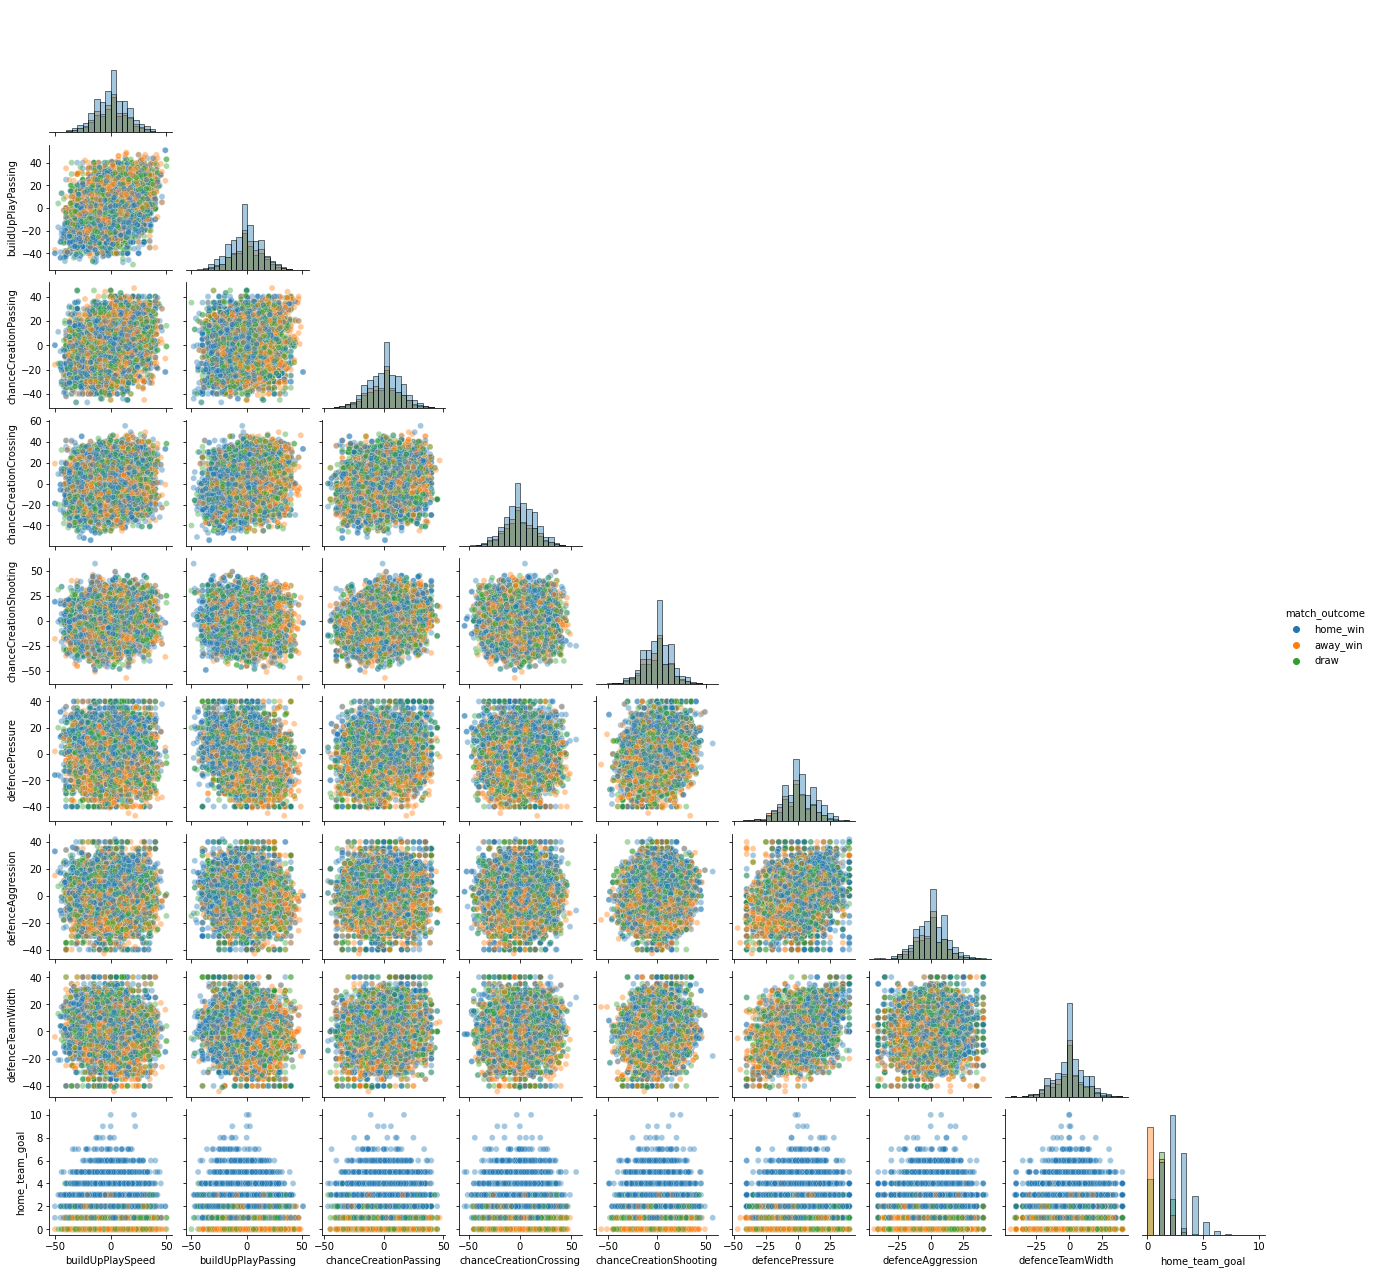

In [48]:
sns.pairplot(
    dataset[[
        'buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing', 
        'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 
        'defenceAggression', 'defenceTeamWidth', 'match_outcome', 'home_team_goal'
    ]],
    hue='match_outcome',
    diag_kind='hist',
    diag_kws={'bins':20, 'alpha':0.4},
    plot_kws={'alpha':0.4},
    corner=True,
    height=2
)

plt.show()

From this visualization we can see two things in terms of the outcome variables. Firstly, the distributions of team attribute data doesn't seem to differ in terms of match outcome variable also the scatter plots do not show any significant linear separability. Secondly, visualy it doesn't seem that there is any significant correlation with the home team goals variable as well as among other variables.

First of all we need to do a test, train split of data. For the test set we will use data of 2015.

In [49]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_validate,\
TimeSeriesSplit
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, mean_absolute_error,\
mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [50]:
predictors = [
    'buildUpPlaySpeed', 'buildUpPlaySpeedClass',
    'buildUpPlayDribblingClass', 'buildUpPlayPassing',
    'buildUpPlayPassingClass', 'chanceCreationPassing',
    'chanceCreationPassingClass', 'chanceCreationCrossing',
    'chanceCreationCrossingClass', 'chanceCreationShooting',
    'chanceCreationShootingClass', 'defencePressure', 'defenceAggression',
    'defenceTeamWidth', 'defenceTeamWidthClass',
    'HT_buildUpPlayPositioningClass_Organised',
    'AT_buildUpPlayPositioningClass_Organised',
    'HT_chanceCreationPositioningClass_Organised',
    'AT_chanceCreationPositioningClass_Organised',
    'HT_defencePressureClass_High', 'HT_defencePressureClass_Medium',
    'AT_defencePressureClass_High', 'AT_defencePressureClass_Medium',
    'HT_defenceAggressionClass_Double', 'HT_defenceAggressionClass_Press',
    'AT_defenceAggressionClass_Double', 'AT_defenceAggressionClass_Press',
    'HT_defenceDefenderLineClass_Offside Trap',
    'AT_defenceDefenderLineClass_Offside Trap',
    'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4',
    'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
    'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
    'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 
    'stage', 'league_id_1729',
    'league_id_4769', 'league_id_7809', 'league_id_10257',
    'league_id_13274', 'league_id_15722', 'league_id_17642',
    'league_id_19694', 'league_id_21518', 'league_id_24558'
]

target_vars = ['home_team_goal', 'match_outcome']

train = dataset[dataset['date'].dt.year!=2015].copy()
train = train[[*predictors,*target_vars]].dropna()

test = dataset[dataset['date'].dt.year==2015].copy()
test = test[[*predictors,*target_vars]].dropna()

Standardizing test and train data.

In [51]:
train[[*predictors, target_vars[0]]] = StandardScaler().fit_transform(
    train[[*predictors, target_vars[0]]].values
)

test[[*predictors, target_vars[0]]] = StandardScaler().fit_transform(
    test[[*predictors, target_vars[0]]].values
)

### Prediction of how much goals a team will score 

#### Regression analysis

In [52]:
outcome = 'home_team_goal'

In [53]:
lm = sm.OLS(
    train[outcome],
    sm.add_constant(train[predictors])
)

res = lm.fit()

res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         home_team_goal   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     11.69
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          3.10e-122
Time:                        12:43:58   Log-Likelihood:                -19989.
No. Observations:               14365   AIC:                         4.012e+04
Df Residuals:                   14295   BIC:                         4.065e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                        1.234e-16      0.008   1.52e-14      1.000      -0.016       0.016
buildUpPlaySpeed                                0.0004      0.012      0.035      0.972      -0.023       0.024
buildUpPlaySpeedClass                          -0.0161      0.012     -1.395      0.163      -0.039       0.007
buildUpPlayDribblingClass                       0.0151      0.008      1.831      0.067      -0.001       0.031
buildUpPlayPassing                             -0.0344      0.012     -2.937      0.003      -0.057      -0.011
buildUpPlayPassingClass                        -0.0218      0.011     -1.915      0.055      -0.044       0.001
chanceCreationPassing                          -0.0102      0.012     -0.877      0.381      -0.033       0.013
chanceCreationPassingClass                     -0.0299      0.011     -2.652      0.008      -0.052      -0.008
chanceCreationCrossing                          0.0516      0.012      4.409      0.000       0.029       0.074
chanceCreationCrossingClass                    -0.0273      0.012     -2.345      0.019      -0.050      -0.004
chanceCreationShooting                          0.0066      0.011      0.613      0.540      -0.014       0.028
chanceCreationShootingClass                     0.0529      0.011      4.946      0.000       0.032       0.074
defencePressure                                 0.0288      0.012      2.363      0.018       0.005       0.053
defenceAggression                               0.0275      0.011      2.504      0.012       0.006       0.049
defenceTeamWidth                               -0.0022      0.011     -0.203      0.840      -0.024       0.019
defenceTeamWidthClass                          -0.0219      0.011     -1.989      0.047      -0.043      -0.000
HT_buildUpPlayPositioningClass_Organised       -0.0679      0.009     -7.376      0.000      -0.086      -0.050
AT_buildUpPlayPositioningClass_Organised        0.0292      0.009      3.189      0.001       0.011       0.047
HT_chanceCreationPositioningClass_Organised    -0.0875      0.009     -9.529      0.000      -0.105      -0.069
AT_chanceCreationPositioningClass_Organised     0.0526      0.009      5.697      0.000       0.035       0.071
HT_defencePressureClass_High                   -0.0082      0.013     -0.638      0.523      -0.033       0.017
HT_defencePressureClass_Medium                 -0.0061      0.012     -0.499      0.618      -0.030       0.018
AT_defencePressureClass_High                   -0.0021      0.013     -0.163      0.871      -0.028       0.024
AT_defencePressureClass_Medium                  0.0048      0.012      0.388      0.698      -0.019       0.029
HT_defenceAggressionClass_Double               -0.0043     

From the initial results we can see that the goodness of fit R^2 is very low only 0.053, so this model doesn't account for a lot of the variability. Also, we can try reducing AIC by removing predictors. Lower AIC means the model can provide the same performance with less information.

In [54]:
from ds_utils import backwards_selection

In [55]:
significant_columns = backwards_selection(
    sm.add_constant(train[predictors]),
    train[outcome],
    alpha=0.05,
    model_type='lin_reg'
)

if 'const' in significant_columns:
  significant_columns.remove('const')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                              Results: Ordinary least squares
Model:                       OLS                 Adj. R-squared (uncentered):    0.050     
Dependent Variable:          home_team_goal      AIC:                            40061.7164
Date:                        2022-11-29 12:44    BIC:                            40266.1752
No. Observations:            14365               Log-Likelihood:                 -20004.   
Df Model:                    27                  F-statistic:                    28.79     
Df Residuals:                14338               Prob (F-statistic):             3.14e-142 
R-squared (uncentered):      0.051               Scale:                          0.95036   
-------------------------------------------------------------------------------------------
                                             Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------------------
buildUpPlayPassing

R^2 didn't increase by removing the insignificant predictors, but AIC did decrease, but by a small amount. Judging by the coefficients the most important predictors seems to be HT_chanceCreationPositioningClass_Organised, HT_buildUpPlayPositioningClass_Organised, league_id_13274, chanceCreationShootingClass, chanceCreationCrossing.

#### Model evaluation

In [56]:
X_train = train[significant_columns]
y_train = train[outcome]

scores = cross_validate(
    LinearRegression(),
    X_train,
    y_train,
    cv=TimeSeriesSplit(5),
    scoring=(
        'r2',
        'neg_mean_absolute_error',
        'neg_mean_squared_error'
    )
)

In [57]:
print(f"Cross-Validation R^2 - Mean: {scores['test_r2'].mean().round(3)}, \
Std. Deviation: {scores['test_r2'].std().round(3)}\n\
Cross-Validation MAE - Mean: {abs(scores['test_neg_mean_absolute_error'].mean().round(3))}, \
Std. Deviation: {abs(scores['test_neg_mean_absolute_error'].std().round(3))}\n\
Cross-Validation MSE - Mean: {abs(scores['test_neg_mean_squared_error'].mean().round(3))}, \
Std. Deviation: {abs(scores['test_neg_mean_squared_error'].std().round(3))}")

Cross-Validation R^2 - Mean: 0.038, Std. Deviation: 0.016
Cross-Validation MAE - Mean: 0.788, Std. Deviation: 0.013
Cross-Validation MSE - Mean: 0.96, Std. Deviation: 0.032


In [58]:
lin_reg_model = LinearRegression().fit(X_train, y_train)

y_pred = lin_reg_model.predict(test[significant_columns])

r2 = r2_score(test[outcome], y_pred)
mae = mean_absolute_error(test[outcome], y_pred)
mse = mean_squared_error(test[outcome], y_pred)

print(f"Test R^2: {r2.round(3)}\n\
Test MAE: {mae.round(3)}\n\
Test MSE: {mse.round(3)}")

Test R^2: 0.035
Test MAE: 0.776
Test MSE: 0.965


Comparing validation and test metrics the results are similar so there is no overfitting, but these results do not look very promising.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


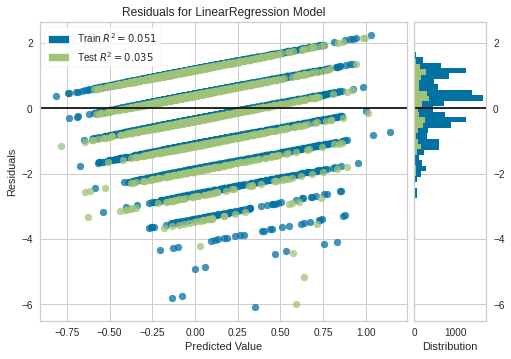

In [59]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lin_reg_model)

visualizer.fit(
    X_train, 
    y_train
)

visualizer.score(
    test[significant_columns],
    test[outcome]
)

visualizer.show()
plt.show()

The residuals plot tells us that there is a lot of error predicting the goals and the fit is quite bad. So it may not be possible to predict goals accurately, because there are many other factors which influence the match. Let's see if a non-linear random forest model performs any better.

#### Training and testing a Random Forest model

In [60]:
from sklearn.ensemble import RandomForestRegressor

scores = cross_validate(
    RandomForestRegressor(
        max_depth=6,
        random_state=0
    ),
    train[predictors],
    y_train,
    cv=TimeSeriesSplit(5),
    scoring=(
        'r2',
        'neg_mean_absolute_error',
        'neg_mean_squared_error'
    )
)

In [61]:
print(f"Cross-Validation R^2 - Mean: {scores['test_r2'].mean().round(3)}, \
Std. Deviation: {scores['test_r2'].std().round(3)}\n\
Cross-Validation MAE - Mean: {abs(scores['test_neg_mean_absolute_error'].mean().round(3))}, \
Std. Deviation: {abs(scores['test_neg_mean_absolute_error'].std().round(3))}\n\
Cross-Validation MSE - Mean: {abs(scores['test_neg_mean_squared_error'].mean().round(3))}, \
Std. Deviation: {abs(scores['test_neg_mean_squared_error'].std().round(3))}")

Cross-Validation R^2 - Mean: 0.033, Std. Deviation: 0.013
Cross-Validation MAE - Mean: 0.795, Std. Deviation: 0.01
Cross-Validation MSE - Mean: 0.966, Std. Deviation: 0.029


In [62]:
rf_model = RandomForestRegressor(
    max_depth=6, 
    random_state=0
).fit(X_train, y_train)

y_pred = rf_model.predict(test[significant_columns])

r2 = r2_score(test[outcome], y_pred)
mae = mean_absolute_error(test[outcome], y_pred)
mse = mean_squared_error(test[outcome], y_pred)

print(f"Test R^2: {r2.round(3)}\n\
Test MAE: {mae.round(3)}\n\
Test MSE: {mse.round(3)}")

Test R^2: 0.043
Test MAE: 0.779
Test MSE: 0.957


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


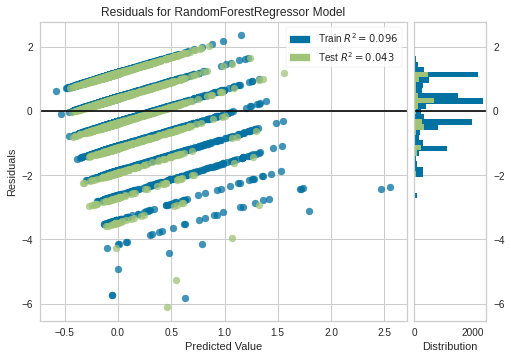

In [63]:
visualizer = ResidualsPlot(rf_model)

visualizer.fit(
    X_train, 
    y_train
)

visualizer.score(
    test[significant_columns],
    test[outcome]
)

visualizer.show()
plt.show()

The R^2 on the test set is slightly higher for the random forest model, but it isn't a significant improvement.

### Prediction of match outcome

#### Regression analysis

In [64]:
outcome = 'match_outcome'

In [65]:
lm = sm.MNLogit(
    train[outcome],
    sm.add_constant(train[predictors])
)

res = lm.fit()

res.summary2()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 1.031937
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: MNLogit
===========================================================================================
Model:                       MNLogit                  Pseudo R-squared:         0.028      
Dependent Variable:          match_outcome            AIC:                      29927.5515 
Date:                        2022-11-29 12:44         BIC:                      30987.7085 
No. Observations:            14365                    Log-Likelihood:           -14824.    
Df Model:                    138                      LL-Null:                  -15254.    
Df Residuals:                14225                    LLR p-value:              1.0927e-104
Converged:                   1.0000                   Scale:                    1.0000     
No. Iterations:              5.0000                                                        
-------------------------------------------------------------------------------------------
             match_outcome = 0               Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------------------
                                      const -0.0750   0.0236 -3.1786 0.0015 -0.1212 -0.0287
                           buildUpPlaySpeed  0.0098   0.0336  0.2911 0.7710 -0.0561  0.0757
                      buildUpPlaySpeedClass -0.0028   0.0327 -0.0870 0.9307 -0.0669  0.0613
                  buildUpPlayDribblingClass  0.0387   0.0233  1.6628 0.0964 -0.0069  0.0843
                         buildUpPlayPassing -0.0492   0.0331 -1.4830 0.1381 -0.1141  0.0158
                    buildUpPlayPassingClass -0.0485   0.0323 -1.4986 0.1340 -0.1119  0.0149
                      chanceCreationPassing  0.0080   0.0328  0.2427 0.8082 -0.0564  0.0723
                 chanceCreationPassingClass -0.0475   0.0321 -1.4801 0.1389 -0.1104  0.0154
                     chanceCreationCrossing  0.0209   0.0331  0.6306 0.5283 -0.0440  0.0858
                chanceCreationCrossingClass -0.0057   0.0330 -0.1725 0.8630 -0.0704  0.0590
                     chanceCreationShooting  0.0365   0.0302  1.2114 0.2257 -0.0226  0.0957
                chanceCreationShootingClass  0.0586   0.0304  1.9292 0.0537 -0.0009  0.1181
                            defencePressure  0.0404   0.0346  1.1682 0.2427 -0.0274  0.1081
                          defenceAggression  0.0298   0.0313  0.9538 0.3402 -0.0315  0.0911
                           defenceTeamWidth  0.0036   0.0309  0.1150 0.9085 -0.0571  0.0642
                      defenceTeamWidthClass  0.0104   0.0314  0.3314 0.7403 -0.0512  0.0720
   HT_buildUpPlayPositioningClass_Organised  0.0170   0.0300  0.5668 0.5708 -0.0418  0.0758
   AT_buildUpPlayPositioningClass_Organised  0.0678   0.0248  2.7331 0.0063  0.0192  0.1164
HT_chanceCreationPositioningClass_Organised -0.0943   0.0281 -3.3597 0.0008 -0.1493 -0.0393
AT_chanceCreationPositioningClass_Organised  0.1067   0.0252  4.2403 0.0000  0.0574  0.1560
               HT_defencePressureClass_High -0.0187   0.0373 -0.5031 0.6149 -0.0918  0.0543
             HT_defencePressureClass_Medium -0.0677   0.0339 -1.9972 0.0458 -0.1341 -0.0013
               AT_defencePressureClass_High  0.0301   0.0371  0.8135 0.4160 -0.0425  0.1028
             AT_defencePressureClass_Medium  0.0257   0.0362  0.7091 0.4783 -0.0453  0.0967
           HT_defenceAggressionClass_Double  0.0470   0.0465  1.0112 0.3119 -0.0441  0.1382
            HT_defenceAggressionClass_Press  0.0440   0.0459  0.9587 0.3377 -0.0459  0.1339
           AT_defenceAggressionClass_Double -0.0589   0.0465 -1.2671 0.2051 -0.1500  0.0322
            AT_defenceAggressionClass_Press -0.0490   0.0465 -1.0537 0.2920 -0.1400  0.0421
   HT_defenceDefenderLineClass_Offside Trap  0.0820   0.0283  2.9038 0.0037  0.0267  0.1374
   AT_defenceDefenderLineClass_Offside Trap -0.0084   0.0273 -0.3073 0.7586 -0.0618  0.0451
                                 

Here we see summary results of a multinomial logistic regression, so we will try applying the same logic here as with linear regression by removing the non significant predictors.

In [66]:
significant_columns = backwards_selection(
    sm.add_constant(train[predictors]),
    train[outcome],
    alpha=0.05,
    model_type='log_reg_multi'
)

if 'const' in significant_columns:
  significant_columns.remove('const')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 1.031937
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.031937
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.031937
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.031974
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.032040
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.032106
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.032110
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.032116
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.032205
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.032406
  

The results are a bit worse pseudo R^2 decreased and AIC increased, but a lot of predictors were dropped. Among the remaining ones the predictors that have the strongest relation with a outcome variable are HT_chanceCreationPositioningClass_Organised, chanceCreationShootingClass, AT_chanceCreationPositioningClass_Organised, buildUpPlayPassingClass.

#### Model evaluation

In [ ]:
from sklearn import preprocessing

X_train = train[significant_columns]

le = preprocessing.LabelEncoder()
le.fit(train[outcome])
y_train = le.transform(train[outcome])

log_reg_model = LogisticRegression(
    solver='liblinear',
    multi_class='ovr',
    random_state=0
)

log_reg_model.fit(X_train, y_train)

cv = TimeSeriesSplit(5)

scores = cross_validate(
    log_reg_model,
    X_train,
    y_train,
    cv=cv,
    scoring=(
        'f1_macro',
        'precision_macro',
        'recall_macro',
        'accuracy'
    )
)

In [68]:
print(f"Cross-Validation Accuracy - Mean: {scores['test_accuracy'].mean().round(3)},\
 Std. Deviation: {scores['test_accuracy'].std().round(3)}\n\
Cross-Validation Precision - Mean: {scores['test_precision_macro'].mean().round(3)},\
 Std. Deviation: {scores['test_precision_macro'].std().round(3)}\n\
Cross-Validation Recall - Mean: {scores['test_recall_macro'].mean().round(3)},\
 Std. Deviation: {scores['test_recall_macro'].std().round(3)}\n\
Cross-Validation F1 - Mean: {scores['test_f1_macro'].mean().round(3)},\
 Std. Deviation: {scores['test_f1_macro'].std().round(3)}")

Cross-Validation Accuracy - Mean: 0.474, Std. Deviation: 0.014
Cross-Validation Precision - Mean: 0.328, Std. Deviation: 0.052
Cross-Validation Recall - Mean: 0.364, Std. Deviation: 0.011
Cross-Validation F1 - Mean: 0.289, Std. Deviation: 0.018


              precision    recall  f1-score   support

    away_win       0.41      0.16      0.24       942
        draw       0.00      0.00      0.00       806
    home_win       0.46      0.92      0.62      1405

    accuracy                           0.46      3153
   macro avg       0.29      0.36      0.28      3153
weighted avg       0.33      0.46      0.35      3153



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWar

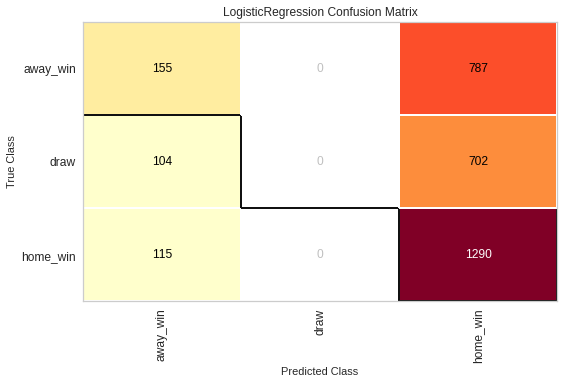

In [69]:
y_pred = log_reg_model.predict(test[significant_columns])

print(classification_report(
    le.transform(test[outcome]),
    y_pred,
    target_names=le.classes_
))

from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(
    log_reg_model, 
    classes=le.classes_
)

cm.fit(X_train, y_train)
cm.score(
    test[significant_columns], 
    test[outcome]
)

cm.show()
plt.show()

The evaluation results aren't very good the model mostly predicted home wins and no draws on the test set.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


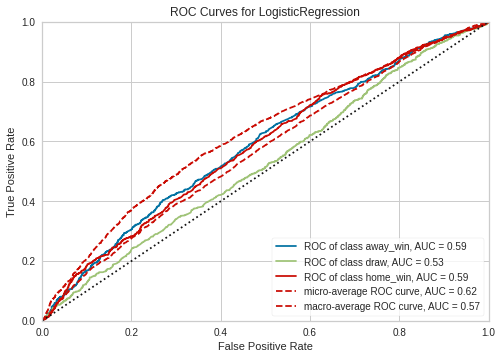

In [70]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(
    log_reg_model, 
    classes=le.classes_, 
    binary=False
)

visualizer.fit(X_train, y_train)
visualizer.score(
    test[significant_columns], 
    test[outcome]
)
visualizer.show()
plt.show()

The ROC curve shows us that the model is just a little bit better than random guessing, which would be the case if AUC would be equal to 0.5. Let's see next if we can get better results with a random forest model.

#### Training and testing a Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=6, random_state=0)
rf_model.fit(train[predictors], y_train)

cv = TimeSeriesSplit(5)

scores = cross_validate(
    rf_model,
    train[predictors],
    y_train,
    cv=cv,
    scoring=(
        'f1_macro',
        'precision_macro',
        'recall_macro',
        'accuracy'
    )
)

In [72]:
print(f"Cross-Validation Accuracy - Mean: {scores['test_accuracy'].mean().round(3)},\
 Std. Deviation: {scores['test_accuracy'].std().round(3)}\n\
Cross-Validation Precision - Mean: {scores['test_precision_macro'].mean().round(3)},\
 Std. Deviation: {scores['test_precision_macro'].std().round(3)}\n\
Cross-Validation Recall - Mean: {scores['test_recall_macro'].mean().round(3)},\
 Std. Deviation: {scores['test_recall_macro'].std().round(3)}\n\
Cross-Validation F1 - Mean: {scores['test_f1_macro'].mean().round(3)},\
 Std. Deviation: {scores['test_f1_macro'].std().round(3)}")

Cross-Validation Accuracy - Mean: 0.469, Std. Deviation: 0.011
Cross-Validation Precision - Mean: 0.37, Std. Deviation: 0.072
Cross-Validation Recall - Mean: 0.347, Std. Deviation: 0.005
Cross-Validation F1 - Mean: 0.247, Std. Deviation: 0.013


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWar

              precision    recall  f1-score   support

    away_win       0.49      0.06      0.10       942
        draw       0.00      0.00      0.00       806
    home_win       0.45      0.98      0.62      1405

    accuracy                           0.45      3153
   macro avg       0.31      0.35      0.24      3153
weighted avg       0.35      0.45      0.31      3153



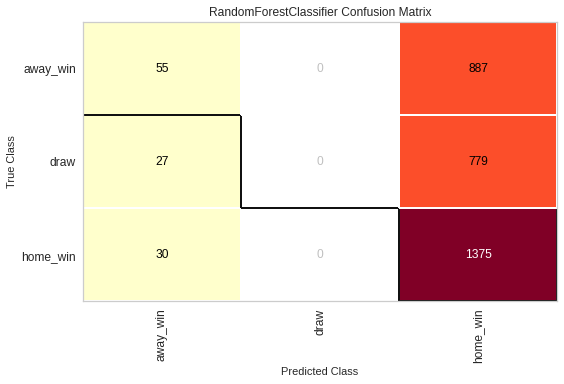

In [73]:
y_pred = rf_model.predict(test[predictors])

print(classification_report(
    le.transform(test[outcome]),
    y_pred,
    target_names=le.classes_
))

cm = ConfusionMatrix(
    rf_model, 
    classes=le.classes_
)

cm.fit(X_train, y_train)
cm.score(
    test[predictors], 
    test[outcome]
)

cm.show()
plt.show()

We get similar results on the test data. Accuracy is pretty much the same. No predictions in draw class mostly in home win class.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


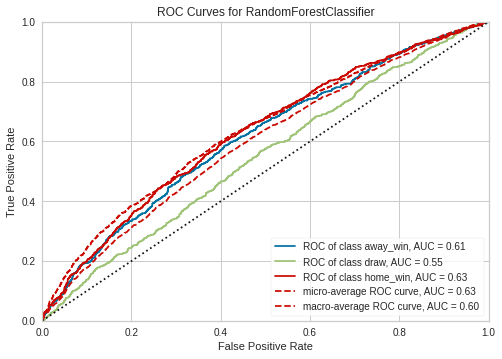

In [74]:
visualizer = ROCAUC(
    rf_model, 
    classes=le.classes_, 
    binary=False
)

visualizer.fit(X_train, y_train)
visualizer.score(
    test[predictors], 
    test[outcome]
)
visualizer.show()
plt.show()

Comparing the previous ROC curve there is a slight increase in AUC. These poor results mean there is more to predicting the outcome of a match than team attributes or team formations. There are various random factors that effect the game.

### Comparing results to betting companies odds.

Let's now compare these results to the odds of betting companies.

In [75]:
betting_comp_odds = dataset[[
    'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 
    'LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'match_outcome'
]].loc[test.index].dropna()

In [76]:
for betting_comp in ['B365', 'BW', 'IW', 'LB', 'WH', 'VC']:
  odds_sum = betting_comp_odds[[
      betting_comp+'H',
      betting_comp+'D',
      betting_comp+'A'
  ]].sum(axis=1)

  betting_comp_odds[betting_comp+'H'] /= odds_sum
  betting_comp_odds[betting_comp+'D'] /= odds_sum
  betting_comp_odds[betting_comp+'A'] /= odds_sum

In [77]:
rf_predictions = rf_model.predict_proba(
    test[predictors].loc[betting_comp_odds.index]
)

In [78]:
betting_comp_odds['predictionH'] = rf_predictions[:,2]
betting_comp_odds['predictionD'] = rf_predictions[:,1]
betting_comp_odds['predictionA'] = rf_predictions[:,0]

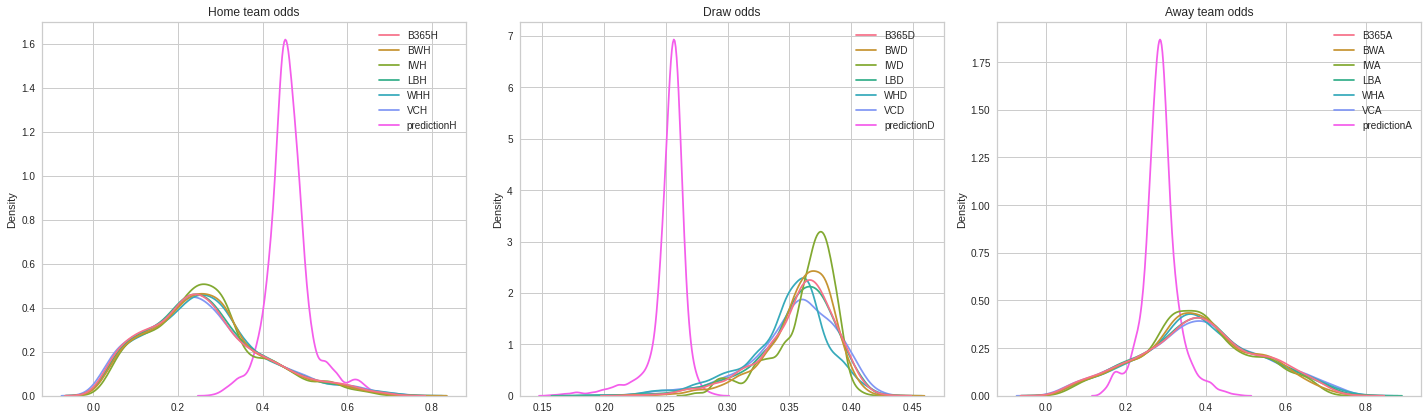

In [79]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))

sns.kdeplot(
    data=betting_comp_odds[[
        comp for comp in [
            'B365H', 'BWH', 'IWH', 'LBH', 'WHH', 'VCH', 'predictionH'
        ]
    ]],
    ax=ax[0]
)

ax[0].set_title('Home team odds')

sns.kdeplot(
    data=betting_comp_odds[[
        comp for comp in [
            'B365D', 'BWD', 'IWD', 'LBD', 'WHD', 'VCD', 'predictionD'
        ]
    ]],
    ax=ax[1]
)

ax[1].set_title('Draw odds')

sns.kdeplot(
    data=betting_comp_odds[[
        comp for comp in [
            'B365A', 'BWA', 'IWA', 'LBA', 'WHA', 'VCA', 'predictionA'
        ]
    ]],
    ax=ax[2]
)

ax[2].set_title('Away team odds')

plt.tight_layout()
plt.show()

The probability distributions of RF predictions and betting companies do not match very well, but distributions among betting companies seem to be very similar. Now let's compare the accuracy.

In [80]:
classes = ['home_win', 'draw', 'away_win']

n_correct_pred = {}

for betting_comp in ['B365', 'BW', 'IW', 'LB', 'WH', 'VC', 'prediction']:
  betting_comp_odds[betting_comp] = betting_comp_odds[[
      betting_comp+'H',
      betting_comp+'D',
      betting_comp+'A'
  ]].apply(lambda x: classes[x.argmax()], axis=1)

  n_correct_pred[betting_comp] = (100*(
      betting_comp_odds[betting_comp]==betting_comp_odds['match_outcome']
  ).sum() / betting_comp_odds.shape[0]).round(1)

n_correct_pred = pd.Series(n_correct_pred).sort_values(ascending=False)

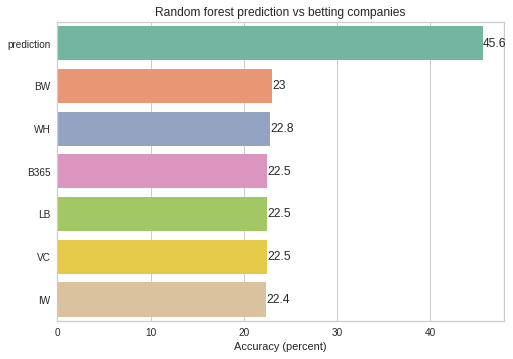

In [81]:
ax = sns.barplot(
    x=n_correct_pred,
    y=n_correct_pred.index,
    palette='Set2'
)

ax.bar_label(ax.containers[0])
ax.set_title('Random forest prediction vs betting companies')
ax.set_xlabel('Accuracy (percent)')

plt.show()

We can see that in terms of the testing data of 2015 the best accuracy is of the trained random forest model.

## Summary

To conclude here are the main things learned from this analysis:
- Plyers in Spain LIGA BBVA league scored the most goals and in Switzerland Super League the fewest;
- Lionel Messi scored the most goals in his Spain LIGA BBVA league and the most of all leagues;
- Lionel Messi, Cristiano Ronaldo, Antonio Di Natale, Wayne Rooney and Stefan Kiessling are top 5 players who scored the most goals their teams;
- The test for difference in goals for home and away teams has proven that there is a home advantage and team that play at home win more often;
- The strongest correlation with player overall attribute rating is with reactions attribute, also goal keeper attributes are more specialized and negatively correlated with other attributes;
- For predicting home team goals, the predictors that have the strongest relation with the outcome variable are HT_chanceCreationPositioningClass_Organised, HT_buildUpPlayPositioningClass_Organised, league_id_13274, chanceCreationShootingClass, chanceCreationCrossing;
- Best model metrics (Random Forest model) on test set, for predicting home team goals, are: R^2 - 0.043, MAE - 0.779, MSE - 0.957;
- For predicting match outcome, the predictors that have the strongest relation with the outcome variable are HT_chanceCreationPositioningClass_Organised, chanceCreationShootingClass, AT_chanceCreationPositioningClass_Organised, buildUpPlayPassingClass;
- Best model metrics (Logistic Regression model) on test set, for predicting match outcome, are: precision - 0.29, recall - 0.36, f1-score - 0.28, accuracy - 0.46, AUC - 0.57;

## Suggestions for improvement

Further research in the domain could provide some more information about other factors that effect football match outcome, like the quality of the stadium, weather. However, football is a rather random game, so there will always be some degree of randomness in the game.